# Sprint データセット作成

## 【問題1】自作データセットでの分類の学習

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_dir = os.path.join('/Users/toyodasatomi/Desktop/DIC/dogcat', 'train')

In [0]:
train_cats_dir = os.path.join(train_dir, 'cats')  # 学習用の猫画像のディレクトリ
train_dogs_dir = os.path.join(train_dir, 'dogs')  # 学習用の犬画像のディレクトリ

In [0]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

#num_cats_val = len(os.listdir(validation_cats_dir))
#num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
#total_val = num_cats_val + num_dogs_val

In [0]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
train_image_generator = ImageDataGenerator(rescale=1./255) # 学習データのジェネレータ

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 10 images belonging to 2 classes.


In [0]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

In [0]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=total_val // batch_size
)

Epoch 1/15


ValueError: Empty training data.

#### エラーを解決しきれなかったので・・・

#### ↓

#### 学習済みモデルで実施してみる

In [0]:
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
import numpy as np

model = VGG16(weights='imagenet', include_top=True)

img_path = '/Users/toyodasatomi/Desktop/DIC/dogcat/train/cats/cat1.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

model.summary()

Using TensorFlow backend.





553467904/553467096 [==============================] - 56s 0us/step


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
blo

In [0]:
preds = model.predict(preprocess_input(x))

In [0]:
print(preds)

[[1.24329927e-06 1.84005842e-06 4.57523839e-07 5.78910931e-06
  9.30420242e-07 6.89958142e-07 6.84065071e-08 1.29347166e-06
  1.17681327e-06 8.34216621e-07 1.16323827e-06 2.13746191e-07
  4.76509877e-06 6.26609847e-07 3.05129646e-07 6.62196499e-06
  1.63985499e-06 1.40667441e-06 7.30697252e-07 4.49625873e-07
  1.63907634e-06 2.36417527e-05 1.16674914e-06 2.38650955e-06
  4.93661100e-05 5.67241295e-06 2.89161494e-06 2.21481469e-06
  6.24073755e-06 7.85177326e-06 4.42006922e-06 2.34026561e-06
  2.10531630e-06 2.51579451e-07 6.15873489e-07 9.97550956e-07
  5.28381770e-06 6.21649633e-06 1.53610381e-05 8.20871810e-06
  1.59633498e-06 6.23225060e-06 1.27664407e-06 5.42864927e-06
  2.94938218e-05 8.87914780e-07 4.91230048e-06 2.06386849e-05
  7.13157590e-07 1.46621130e-06 2.41014095e-06 1.19707605e-03
  2.08796450e-06 5.76797788e-07 6.83952578e-07 1.93271802e-07
  2.17402686e-07 2.75680065e-07 9.42938584e-07 7.35000981e-07
  1.10112182e-06 1.32153332e-07 8.48782747e-07 4.71707438e-07
  1.5795

In [0]:
preds.shape

(1, 1000)

In [0]:
top = decode_predictions(preds, top=5)

40960/35363 [==================================] - 0s 0us/step


In [0]:
for i in range(0, len(top)):
  print('{i}:'.format(i=i))
  for j in range(0, len(top[i])):
    name, desc, score = top[i][j]
    print('  {rank}    {desc} {score:02.1f}%'
	      .format(rank=j+1, desc=desc, score=score*100))

0:
  1    tabby 51.9%
  2    Egyptian_cat 27.7%
  3    tiger_cat 17.1%
  4    radiator 0.8%
  5    lynx 0.3%


#### VGG16のモデルで分類できた

## 【問題2】分類データセットに対するデータ拡張

In [0]:
import numpy  as np
import os
import glob 
import re

import matplotlib.pyplot as plt

import cv2
from PIL import Image

%matplotlib inline

In [0]:
#pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


###  osを使用する場合

In [0]:
path = '/Users/toyodasatomi/Desktop/DIC/dogcat/' 
flist = os.listdir(path)

In [0]:
flist

['classes.txt',
 'cat2.txt',
 'cat1.jpeg',
 'dog1.jpeg',
 'cat4.jpeg',
 'dog2.jpeg',
 'doc3.jpeg',
 'cat5.jpeg',
 'cat2.jpeg',
 'dog5.jpeg',
 'dog4.jpeg',
 'cat3.jpeg']

In [0]:
flist_ignore = [name for name in os.listdir(path) if not name.startswith('.')]
flist_ignore

['classes.txt',
 'cat2.txt',
 'cat1.jpeg',
 'dog1.jpeg',
 'cat4.jpeg',
 'dog2.jpeg',
 'doc3.jpeg',
 'cat5.jpeg',
 'cat2.jpeg',
 'dog5.jpeg',
 'dog4.jpeg',
 'cat3.jpeg']

In [0]:
flist_ignore[0]

'classes.txt'

In [0]:
len(flist_ignore)

12

In [0]:
print(flist_ignore[1])

dog1.jpeg


In [0]:
pathn = '/Users/toyodasatomi/Desktop/DIC/na/' 

In [0]:
img_list_n = glob.glob(pathn + '/*' + ".jpg")

In [0]:
print(img_list_n)

['/Users/toyodasatomi/Desktop/DIC/na/image.jpg']


(224, 224, 3)


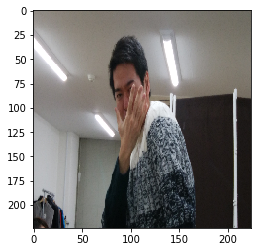

In [0]:
n_img = Image.open(img_list_n[0])
        
# サイズを揃える
n_img = n_img.resize((224, 224))

n_img = np.array(n_img)

print(n_img.shape)

plt.imshow(n_img)

## globを使用する場合

In [0]:
img_list = glob.glob(path + '/*' + ".jpeg")

In [0]:
print(path)

/Users/toyodasatomi/Desktop/DIC/dogcat/


In [0]:
print(img_list)

['/Users/toyodasatomi/Desktop/DIC/dogcat/cat1.jpeg', '/Users/toyodasatomi/Desktop/DIC/dogcat/dog1.jpeg', '/Users/toyodasatomi/Desktop/DIC/dogcat/cat4.jpeg', '/Users/toyodasatomi/Desktop/DIC/dogcat/dog2.jpeg', '/Users/toyodasatomi/Desktop/DIC/dogcat/doc3.jpeg', '/Users/toyodasatomi/Desktop/DIC/dogcat/cat5.jpeg', '/Users/toyodasatomi/Desktop/DIC/dogcat/cat2.jpeg', '/Users/toyodasatomi/Desktop/DIC/dogcat/dog5.jpeg', '/Users/toyodasatomi/Desktop/DIC/dogcat/dog4.jpeg', '/Users/toyodasatomi/Desktop/DIC/dogcat/cat3.jpeg']


In [0]:
print(Image.open(img_list[1]))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=259x194 at 0x1285A9160>


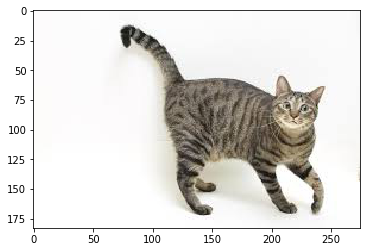

In [0]:
plt.imshow(Image.open(path + flist_ignore[0]))

In [0]:
cat_img = Image.open(img_list[1])

In [0]:
cat_img

array([[[[0.39607843, 0.23921569, 0.14117647],
         [0.39607843, 0.23921569, 0.1372549 ],
         [0.40392157, 0.24705882, 0.14509804],
         ...,
         [0.85490196, 0.74509804, 0.65882353],
         [0.90588235, 0.77254902, 0.6745098 ],
         [0.94509804, 0.81176471, 0.71372549]],

        [[0.39607843, 0.23921569, 0.14117647],
         [0.39607843, 0.23921569, 0.1372549 ],
         [0.40392157, 0.24705882, 0.14509804],
         ...,
         [0.83921569, 0.71764706, 0.63529412],
         [0.89019608, 0.75686275, 0.65882353],
         [0.92941176, 0.79607843, 0.69803922]],

        [[0.39215686, 0.23529412, 0.1372549 ],
         [0.39607843, 0.23921569, 0.1372549 ],
         [0.40392157, 0.24705882, 0.14509804],
         ...,
         [0.80784314, 0.68627451, 0.60392157],
         [0.87058824, 0.7372549 , 0.63921569],
         [0.90980392, 0.77647059, 0.67843137]],

        ...,

        [[1.        , 0.92156863, 0.78431373],
         [0.99607843, 0.90588235, 0.77254902]

(224, 224, 3)


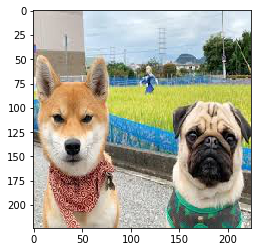

In [0]:
# サイズを揃える
cat_img = cat_img.resize((224, 224))

cat_img = np.array(cat_img)

print(cat_img.shape)

plt.imshow(cat_img)

In [0]:
img

array([[[199, 205, 212],
        [199, 205, 212],
        [199, 205, 212],
        ...,
        [239, 230, 217],
        [239, 231, 218],
        [239, 231, 218]],

       [[199, 205, 212],
        [199, 205, 212],
        [199, 205, 212],
        ...,
        [239, 230, 217],
        [239, 231, 218],
        [239, 231, 218]],

       [[198, 204, 211],
        [198, 204, 211],
        [198, 204, 211],
        ...,
        [240, 231, 217],
        [240, 232, 219],
        [240, 232, 219]],

       ...,

       [[190, 197, 196],
        [182, 188, 187],
        [201, 207, 206],
        ...,
        [187, 195, 199],
        [163, 173, 174],
        [184, 192, 193]],

       [[194, 201, 196],
        [195, 202, 199],
        [195, 201, 200],
        ...,
        [193, 198, 197],
        [190, 195, 194],
        [194, 199, 198]],

       [[201, 209, 202],
        [200, 207, 203],
        [196, 205, 203],
        ...,
        [201, 204, 201],
        [200, 203, 201],
        [199, 202, 200]]

<class 'numpy.ndarray'>


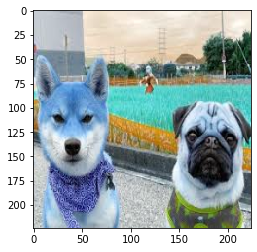

In [0]:
img = cv2.imread(img_list[1])

# cv2でリサイズ
img = cv2.resize(img, (224, 224))

print(type(img))

plt.imshow(img)

In [0]:
os.walk(path)

<generator object walk at 0x128640e58>

In [0]:
dog_img_array = np.empty((0,224,224,3))
cat_img_array = np.empty((0,224,224,3))

for img in img_list:
    
    # ファイル名に'dog'が含まれるイメージ
    if re.search('dog', img):
        
        dog_img = Image.open(img)
        
        # サイズを揃える
        dog_img = dog_img.resize((224, 224))
        
        # PIL.Image.Imageからnumpy配列へ
        dog_img = np.array(dog_img)
        
        # 正規化
        dog_img = dog_img / 255.0
        
        # axisの追加
        dog_img = dog_img.reshape((1,224,224,3))
        
        dog_img_array = np.concatenate([dog_img_array, dog_img], axis = 0)
    
    # ファイル名に'cat'が含まれるイメージ
    if re.search('cat', img):
        
        cat_img = Image.open(img)
        
        cat_img = cat_img.resize((224, 224))
        
        cat_img = np.array(cat_img)
        
        cat_img = cat_img / 255.0
        
        cat_img = cat_img.reshape((1,224,224,3))
        
        cat_img_array = np.concatenate([cat_img_array, cat_img], axis = 0)

In [0]:
print('dog_image:{}  cat_image:{}'.format(dog_img_array.shape, cat_img_array.shape))

dog_image:(10, 224, 224, 3)  cat_image:(10, 224, 224, 3)


 # イメージの表示

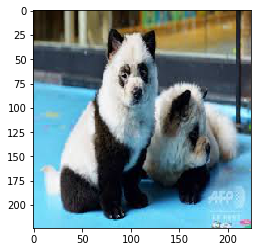

In [0]:
plt.imshow(cat_img_array[8])

### 天気

In [0]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [0]:
import albumentations as albu

In [0]:
#pip install albumentations

Note: you may need to restart the kernel to use updated packages.


In [0]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
image = download_image('https://grapee.jp/wp-content/uploads/54897_main1.jpg')

In [0]:
image.shape

(900, 1200, 3)

In [0]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(20, 10))
    plt.imshow(image)

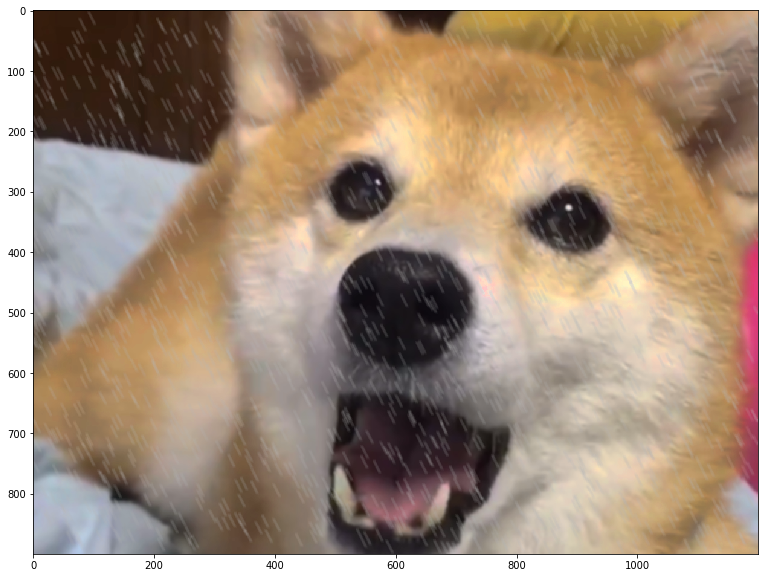

In [0]:
aug = albu.RandomRain(p=1, brightness_coefficient=0.9, drop_width=1, blur_value=5)
augment_and_show(aug, image)

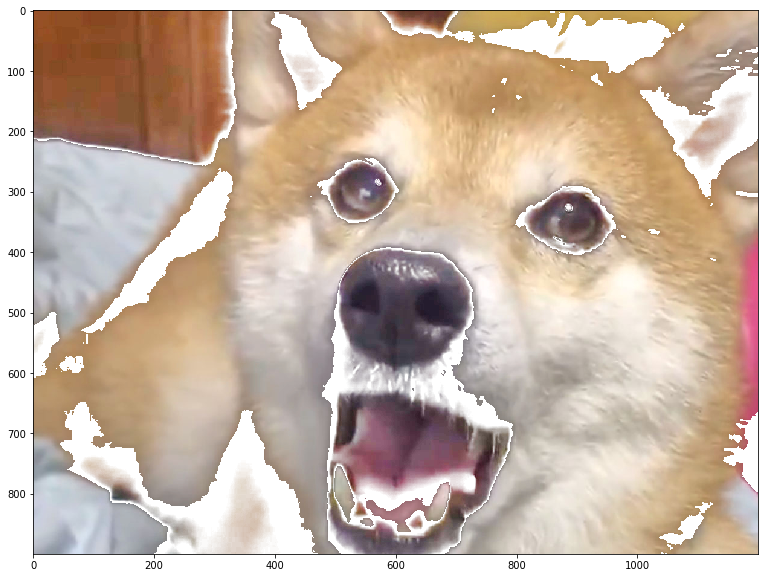

In [0]:
aug = albu.RandomSnow(p=1, brightness_coeff=2.5, snow_point_lower=0.3, snow_point_upper=0.5)
augment_and_show(aug, image)

In [0]:
inu2 = cat_img_array[8]

In [0]:
def download_image2(im_list):
    data = Image.open(im_list)
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

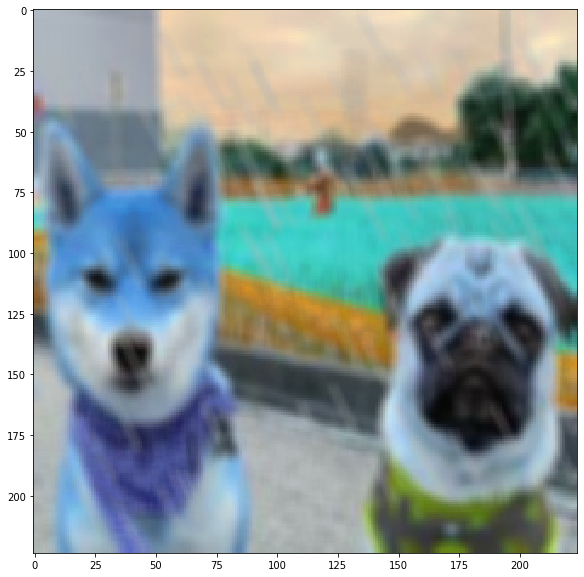

In [0]:
aug = albu.RandomRain(p=1, brightness_coefficient=0.9, drop_width=1, blur_value=5)
augment_and_show(aug, img)

### 色変化

In [0]:
import os

import numpy as np
import cv2
from matplotlib import pyplot as plt
from skimage.color import label2rgb

import albumentations as A
import random

BOX_COLOR = (255, 0, 0)
TEXT_COLOR = (255, 255, 255)

def visualize_bbox(img, bbox, color=BOX_COLOR, thickness=2, **kwargs):
    #height, width = img.shape[:2]

    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)
    return img

def visualize_titles(img, bbox, title, color=BOX_COLOR, thickness=2, font_thickness = 2, font_scale=0.35, **kwargs):
    #height, width = img.shape[:2]
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)
    
    ((text_width, text_height), _) = cv2.getTextSize(title, cv2.FONT_HERSHEY_SIMPLEX, font_scale, font_thickness)
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(img, title, (x_min, y_min - int(0.3 * text_height)), cv2.FONT_HERSHEY_SIMPLEX, font_scale, TEXT_COLOR,
                font_thickness, lineType=cv2.LINE_AA)
    return img


def augment_and_show(aug, image, mask=None, bboxes=[], categories=[], category_id_to_name=[], filename=None, 
                     font_scale_orig=0.35, 
                     font_scale_aug=0.35, show_title=True, **kwargs):

    augmented = aug(image=image, mask=mask, bboxes=bboxes, category_id=categories)

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_aug = cv2.cvtColor(augmented['image'], cv2.COLOR_BGR2RGB)

    for bbox in bboxes:
        visualize_bbox(image, bbox, **kwargs)

    for bbox in augmented['bboxes']:
        visualize_bbox(image_aug, bbox, **kwargs)

    if show_title:
        for bbox,cat_id in zip(bboxes, categories):
            visualize_titles(image, bbox, category_id_to_name[cat_id], font_scale=font_scale_orig, **kwargs)
        for bbox,cat_id in zip(augmented['bboxes'], augmented['category_id']):
            visualize_titles(image_aug, bbox, category_id_to_name[cat_id], font_scale=font_scale_aug, **kwargs)

    
    if mask is None:
        f, ax = plt.subplots(1, 2, figsize=(16, 8))
        
        ax[0].imshow(image)
        ax[0].set_title('Original image')
        
        ax[1].imshow(image_aug)
        ax[1].set_title('Augmented image')
    else:
        f, ax = plt.subplots(2, 2, figsize=(16, 16))
        
        if len(mask.shape) != 3:
            mask = label2rgb(mask, bg_label=0)            
            mask_aug = label2rgb(augmented['mask'], bg_label=0)
        else:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
            mask_aug = cv2.cvtColor(augmented['mask'], cv2.COLOR_BGR2RGB)
            
        ax[0, 0].imshow(image)
        ax[0, 0].set_title('Original image')
        
        ax[0, 1].imshow(image_aug)
        ax[0, 1].set_title('Augmented image')
        
        ax[1, 0].imshow(mask, interpolation='nearest')
        ax[1, 0].set_title('Original mask')

        ax[1, 1].imshow(mask_aug, interpolation='nearest')
        ax[1, 1].set_title('Augmented mask')

    f.tight_layout()
    if filename is not None:
        f.savefig(filename)
        
    return augmented['image'], augmented['mask'], augmented['bboxes']

def find_in_dir(dirname):
    return [os.path.join(dirname, fname) for fname in sorted(os.listdir(dirname))]

In [0]:
random.seed(42)
image = cv2.imread('/Users/toyodasatomi/Desktop/DIC/dogcat/cat5.jpeg')

light = A.Compose([
    A.RandomBrightnessContrast(p=1),    
    A.RandomGamma(p=1),    
    A.CLAHE(p=1),    
], p=1)

medium = A.Compose([
    A.CLAHE(p=1),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=50, val_shift_limit=50, p=1),
], p=1)


strong = A.Compose([
    A.ChannelShuffle(p=1),
], p=1)

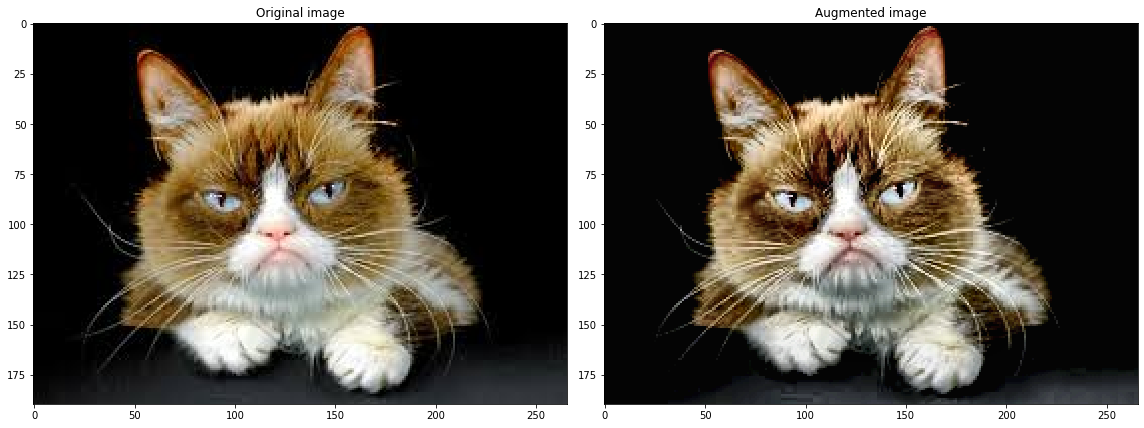

In [0]:
r = augment_and_show(light, image)

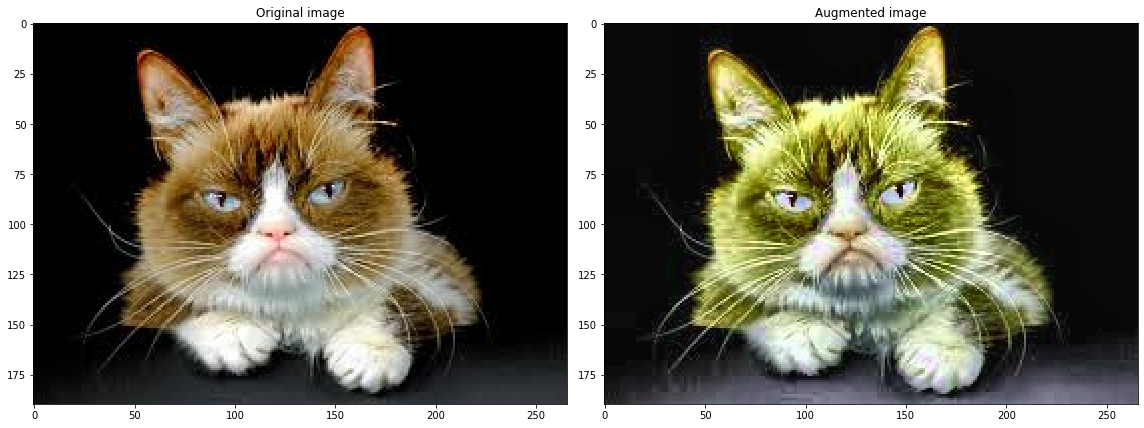

In [0]:
r = augment_and_show(medium, image)

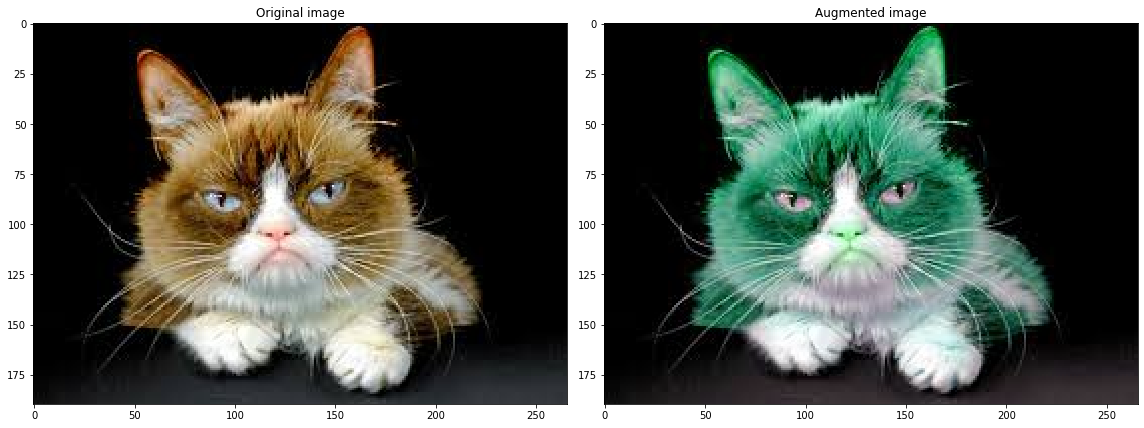

In [0]:
r = augment_and_show(strong, image)

### 反転

In [0]:
from urllib.request import urlopen

import numpy as np
import cv2
from matplotlib import pyplot as plt

In [0]:
from albumentations import (
    HorizontalFlip, IAAPerspective, ShiftScaleRotate, CLAHE, RandomRotate90,
    Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion, HueSaturationValue,
    IAAAdditiveGaussianNoise, GaussNoise, MotionBlur, MedianBlur, RandomBrightnessContrast, IAAPiecewiseAffine,
    IAASharpen, IAAEmboss, Flip, OneOf, Compose
)

In [0]:
def download_image(url):
    data = urlopen(url).read()
    data = np.frombuffer(data, np.uint8)
    image = cv2.imdecode(data, cv2.IMREAD_COLOR)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [0]:
url = 'https://grapee.jp/wp-content/uploads/54897_main1.jpg'

In [0]:
data = urlopen(url).read()

In [0]:
print(data)

b'\xff\xd8\xff\xe1\x12\xacExif\x00\x00MM\x00*\x00\x00\x00\x08\x00\x07\x01\x12\x00\x03\x00\x00\x00\x01\x00\x01\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x00b\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x00j\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x011\x00\x02\x00\x00\x00"\x00\x00\x00r\x012\x00\x02\x00\x00\x00\x14\x00\x00\x00\x94\x87i\x00\x04\x00\x00\x00\x01\x00\x00\x00\xa8\x00\x00\x00\xd4\x00\n\xfc\x80\x00\x00\'\x10\x00\n\xfc\x80\x00\x00\'\x10Adobe Photoshop CC 2019 (Windows)\x002019:08:29 16:47:32\x00\x00\x03\xa0\x01\x00\x03\x00\x00\x00\x01\xff\xff\x00\x00\xa0\x02\x00\x04\x00\x00\x00\x01\x00\x00\x04\xb0\xa0\x03\x00\x04\x00\x00\x00\x01\x00\x00\x03\x84\x00\x00\x00\x00\x00\x00\x00\x06\x01\x03\x00\x03\x00\x00\x00\x01\x00\x06\x00\x00\x01\x1a\x00\x05\x00\x00\x00\x01\x00\x00\x01"\x01\x1b\x00\x05\x00\x00\x00\x01\x00\x00\x01*\x01(\x00\x03\x00\x00\x00\x01\x00\x02\x00\x00\x02\x01\x00\x04\x00\x00\x00\x01\x00\x00\x012\x02\x02\x00\x04\x00\x00\x00\x01\x00\x00\x11r\x00\x00\x00\x00\x00\x00\x00H\

In [0]:
data = np.frombuffer(data, np.uint8)

In [0]:
print(image)

[[[ 70  48  25]
  [ 77  55  32]
  [ 74  53  32]
  ...
  [189 184 188]
  [187 182 189]
  [169 164 171]]

 [[ 95  73  50]
  [ 95  73  52]
  [ 84  63  42]
  ...
  [169 164 168]
  [168 163 169]
  [151 146 153]]

 [[110  88  67]
  [109  87  66]
  [ 96  75  56]
  ...
  [142 137 141]
  [145 140 146]
  [131 126 132]]

 ...

 [[ 62  74  28]
  [ 56  68  22]
  [ 52  64  18]
  ...
  [110 116  56]
  [109 118  55]
  [110 119  56]]

 [[ 56  68  22]
  [ 49  61  15]
  [ 45  57  11]
  ...
  [111 117  57]
  [111 120  57]
  [112 121  58]]

 [[ 51  62  19]
  [ 44  55  12]
  [ 41  52   9]
  ...
  [112 118  58]
  [113 121  61]
  [115 123  63]]]


In [0]:
print(data.shape)

(101737,)


In [0]:
print(inu2[1])

[[0.13333333 0.09803922 0.03921569]
 [0.12941176 0.09411765 0.03529412]
 [0.15686275 0.12156863 0.0627451 ]
 [0.18431373 0.14901961 0.09019608]
 [0.19215686 0.15686275 0.09803922]
 [0.17647059 0.14117647 0.08235294]
 [0.15686275 0.12156863 0.0627451 ]
 [0.12941176 0.09411765 0.03529412]
 [0.12156863 0.08627451 0.02745098]
 [0.12941176 0.09411765 0.03529412]
 [0.14509804 0.10980392 0.05098039]
 [0.14117647 0.10588235 0.04705882]
 [0.12941176 0.09411765 0.03529412]
 [0.08627451 0.05882353 0.02745098]
 [0.09019608 0.05490196 0.02745098]
 [0.09019608 0.05490196 0.01960784]
 [0.09019608 0.05490196 0.01960784]
 [0.09019608 0.05490196 0.01960784]
 [0.09411765 0.05490196 0.01568627]
 [0.09411765 0.05490196 0.01568627]
 [0.10980392 0.0627451  0.01568627]
 [0.11372549 0.06666667 0.01960784]
 [0.12156863 0.0745098  0.02745098]
 [0.12941176 0.0745098  0.03137255]
 [0.1372549  0.08235294 0.03137255]
 [0.1372549  0.08235294 0.03137255]
 [0.14509804 0.0745098  0.03529412]
 [0.14509804 0.07843137 0.03

In [0]:
print(image[2])

[[110  88  67]
 [109  87  66]
 [ 96  75  56]
 ...
 [142 137 141]
 [145 140 146]
 [131 126 132]]


In [0]:
image = download_image('https://d177hi9zlsijyy.cloudfront.net/wp-content/uploads/sites/2/2018/05/11202041/180511105900-atlas-boston-dynamics-robot-running-super-tease.jpg')

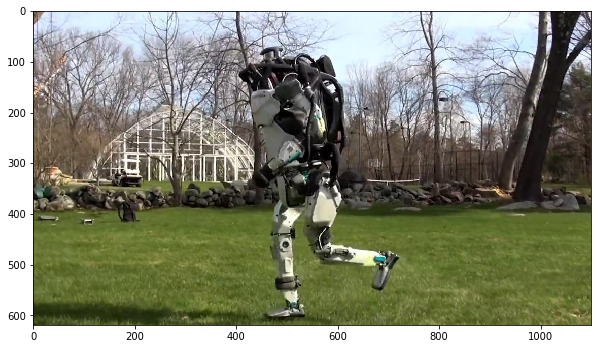

In [0]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.show()

In [0]:
def augment_and_show(aug, image):
    image = aug(image=image)['image']
    plt.figure(figsize=(10, 10))
    plt.imshow(image)

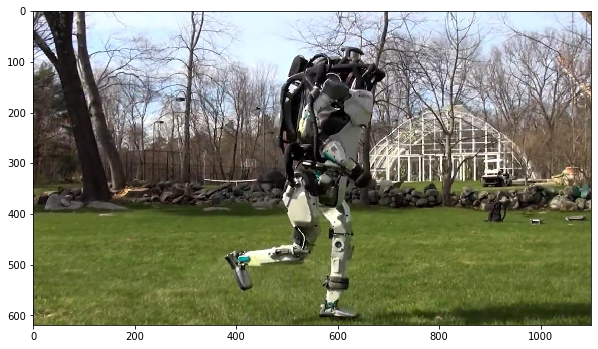

In [0]:
aug = HorizontalFlip(p=1)
augment_and_show(aug, image)

## keras

In [0]:
import matplotlib.pyplot as plt
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [0]:
# 画像ファイルをPIL形式でオープン
img = image.load_img(img_list)
# PIL形式をnumpyのndarray形式に変換
x = image.img_to_array(img)
# (height, width, 3) -> (1, height, width, 3)
x = x.reshape((1,) + x.shape)

In [0]:
print(Image.open(img_list[1]))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=259x194 at 0x1C56DB2AC8>


In [0]:
omggg = image.load_img(path = '/Users/toyodasatomi/Desktop/DIC/dogcat/dog5.jpeg')

In [0]:
x = image.img_to_array(omggg)
# (height, width, 3) -> (1, height, width, 3)
x = x.reshape((1,) + x.shape)

In [0]:
datagen = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

In [0]:
def show_imgs(imgs, row, col):
    """Show PILimages as row*col
     # Arguments
            imgs: 1-D array, include PILimages
            row: Int, row for plt.subplot
            col: Int, column for plt.subplot
    """
    if len(imgs) != (row * col):
        raise ValueError("Invalid imgs len:{} col:{} row:{}".format(len(imgs), row, col))

    for i, img in enumerate(imgs):
        plot_num = i+1
        plt.subplot(row, col, plot_num)
        plt.tick_params(labelbottom="off") # x軸の削除
        plt.tick_params(labelleft="off") # y軸の削除
        plt.imshow(img)
    plt.show()

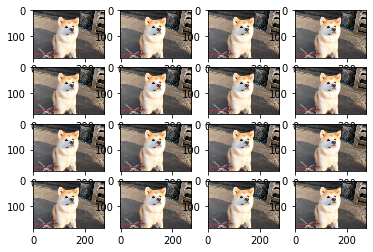

In [0]:
max_img_num = 16
imgs = []
for d in datagen.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [0]:
datagen2 = ImageDataGenerator(
           rotation_range=90,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

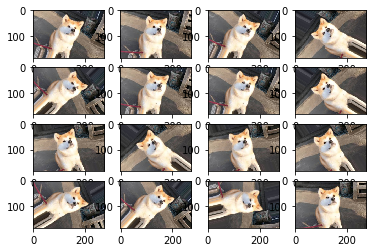

In [0]:
max_img_num = 16
imgs = []
for d in datagen2.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [0]:
datagen3 = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0.5,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=False,
           vertical_flip=False)

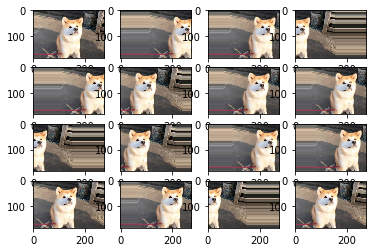

In [0]:
max_img_num = 16
imgs = []
for d in datagen3.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [0]:
datagen4 = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=0,
           horizontal_flip=True,
           vertical_flip=False)

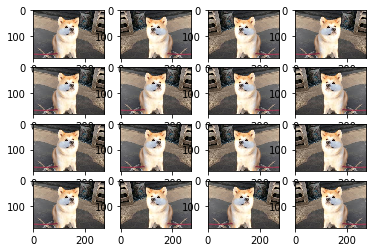

In [0]:
max_img_num = 16
imgs = []
for d in datagen4.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [0]:
datagen6 = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=0,
           zoom_range=[0.5,1],
           horizontal_flip=True,
           vertical_flip=False)

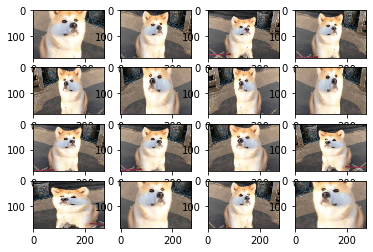

In [0]:
max_img_num = 16
imgs = []
for d in datagen6.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [0]:
datagen7 = ImageDataGenerator(
           rotation_range=0,
           width_shift_range=0,
           height_shift_range=0,
           shear_range=40,
           zoom_range=[0.5,1],
           horizontal_flip=True,
           vertical_flip=False)

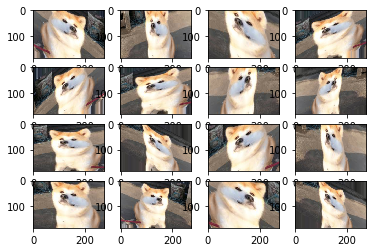

In [0]:
max_img_num = 16
imgs = []
for d in datagen7.flow(x, batch_size=1):
    # このあと画像を表示するためにndarrayをPIL形式に変換して保存する
    imgs.append(image.array_to_img(d[0], scale=True))
    # datagen.flowは無限ループするため必要な枚数取得できたらループを抜ける
    if (len(imgs) % max_img_num) == 0:
        break
show_imgs(imgs, row=4, col=4)

In [0]:
import sys

print(sys.version)

3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


### 分類モデルの一部分を上記を利用しながら再学習して再分類してみる

In [2]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D,Input
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
N_CATEGORIES = 2
IMAGE_SIZE = 224
BATCH_SIZE = 5
NUM_EPOCHS = 50

In [0]:
train_data_dir = '/content/drive/My Drive/DIC/dogcat/train'
validation_data_dir =  '/content/drive/My Drive/DIC/dogcat/train'

In [0]:
input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))
base_model = VGG16(weights='imagenet', include_top=False, input_tensor=input_tensor)

In [0]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(N_CATEGORIES, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [0]:
for layer in base_model.layers[:15]:
    layer.trainable = False
from keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy',metrics=['accuracy'])

#### 指定部分だけ再学習

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [18]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [20]:
pwd

'/content'

In [26]:
cd /content/drive/My Drive/DIC/dogcat/train

/content/drive/My Drive/DIC/dogcat/train


In [27]:
pwd

'/content/drive/My Drive/DIC/dogcat/train'

In [23]:
ls

cat/  dog/


In [28]:
ls -a

cats/  dogs/  .DS_Store


In [33]:
train_datagen = ImageDataGenerator(
   rescale=1.0 / 255,
   shear_range=0.2,
   zoom_range=0.2,
   horizontal_flip=True,
   rotation_range=10)
test_datagen = ImageDataGenerator(
   rescale=1.0 / 255,
)
train_generator = train_datagen.flow_from_directory(
   train_data_dir,
   target_size=(IMAGE_SIZE, IMAGE_SIZE),
   batch_size=BATCH_SIZE,
   class_mode='categorical',
   shuffle=True
)

Found 10 images belonging to 2 classes.


In [34]:
validation_generator = test_datagen.flow_from_directory(
   validation_data_dir,
   target_size=(IMAGE_SIZE, IMAGE_SIZE),
   batch_size=BATCH_SIZE,
   class_mode='categorical',
   shuffle=True
)


Found 10 images belonging to 2 classes.


In [0]:
NUM_TRAINING = 30
NUM_VALIDATION = 5

#### notebookではカーネルが落ちるのでcolabでやってみる

In [35]:
history = model.fit_generator(train_generator,
   steps_per_epoch=NUM_TRAINING//BATCH_SIZE,
   epochs=NUM_EPOCHS,
   verbose=1,
   validation_data=validation_generator,
   validation_steps=NUM_VALIDATION//BATCH_SIZE,
   )

Epoch 1/50
6/6 [==============================] - 24s 4s/step - loss: 0.7203 - acc: 0.5000 - val_loss: 0.7564 - val_acc: 0.4000
Epoch 2/50
6/6 [==============================] - 22s 4s/step - loss: 0.6912 - acc: 0.4667 - val_loss: 0.6522 - val_acc: 0.6000
Epoch 3/50
6/6 [==============================] - 22s 4s/step - loss: 0.6838 - acc: 0.5333 - val_loss: 0.6850 - val_acc: 0.8000
Epoch 4/50
6/6 [==============================] - 22s 4s/step - loss: 0.6492 - acc: 0.8333 - val_loss: 0.6043 - val_acc: 1.0000
Epoch 5/50
6/6 [==============================] - 22s 4s/step - loss: 0.6398 - acc: 0.7667 - val_loss: 0.6340 - val_acc: 0.8000
Epoch 6/50
6/6 [==============================] - 22s 4s/step - loss: 0.6312 - acc: 0.8000 - val_loss: 0.6116 - val_acc: 1.0000
Epoch 7/50
6/6 [==============================] - 22s 4s/step - loss: 0.6244 - acc: 0.8000 - val_loss: 0.5967 - val_acc: 1.0000
Epoch 8/50
6/6 [==============================] - 22s 4s/step - loss: 0.5880 - acc: 1.0000 - val_loss: 0

In [0]:
model.save('transfer.h5')

In [0]:
from keras.applications.vgg16 import preprocess_input
import keras.preprocessing.image as Image
import numpy as np
from keras.models import load_model


In [0]:
model = load_model('transfer.h5')

#### 遠藤さんからの提供データでテスト

In [0]:
image_path = "/content/drive/My Drive/DIC/dogcat/test/cat_1.jpg"


In [0]:
image = Image.load_img(image_path, target_size=(224, 224))  # imagenet size
x = Image.img_to_array(image)  # numpy 配列に変換
x = np.expand_dims(x, axis=0)  # add batch size dim
x = preprocess_input(x)

In [0]:
preds = model.predict(preprocess_input(x))

In [57]:
result = model.predict(x, 1)[0]
for i, score in enumerate(result):
    if i==0:
        print('{}: {:.2%}'.format('ネコ', score))
    else :
        print('{}: {:.2%}'.format('イヌ', score))

ネコ: 100.00%
イヌ: 0.00%


In [0]:
image_path = "/content/drive/My Drive/DIC/dogcat/test/dog_1.jpg"

In [0]:
image = Image.load_img(image_path, target_size=(224, 224))  # imagenet size
do = Image.img_to_array(image)  # numpy 配列に変換
do = np.expand_dims(x, axis=0)  # add batch size dim
do = preprocess_input(x)

In [0]:
preds = model.predict(preprocess_input(x))

In [66]:
result = model.predict(do, 1)[0]
for i, score in enumerate(result):
    if i==0:
        print('{}: {:.2%}'.format('ネコ', score))
    else :
        print('{}: {:.2%}'.format('イヌ', score))

ネコ: 100.00%
イヌ: 0.00%


間違い

In [0]:
image_path = "/content/data/train/dog/doc3.jpeg"

In [0]:
image = Image.load_img(image_path, target_size=(224, 224))  # imagenet size
ca = Image.img_to_array(image)  # numpy 配列に変換
ca = np.expand_dims(x, axis=0)  # add batch size dim
ca = preprocess_input(x)

In [69]:
result = model.predict(ca, 1)[0]
for i, score in enumerate(result):
    if i==0:
        print('{}: {:.2%}'.format('ネコ', score))
    else :
        print('{}: {:.2%}'.format('イヌ', score))

ネコ: 100.00%
イヌ: 0.00%


#### 間違い..みんなネコになる。。。データセットの作成方法と利用方法については理解できたのでうまく学習しきれなかったが、これで断念する

## 【問題3】物体検出データセットの用意

#### ツール利用

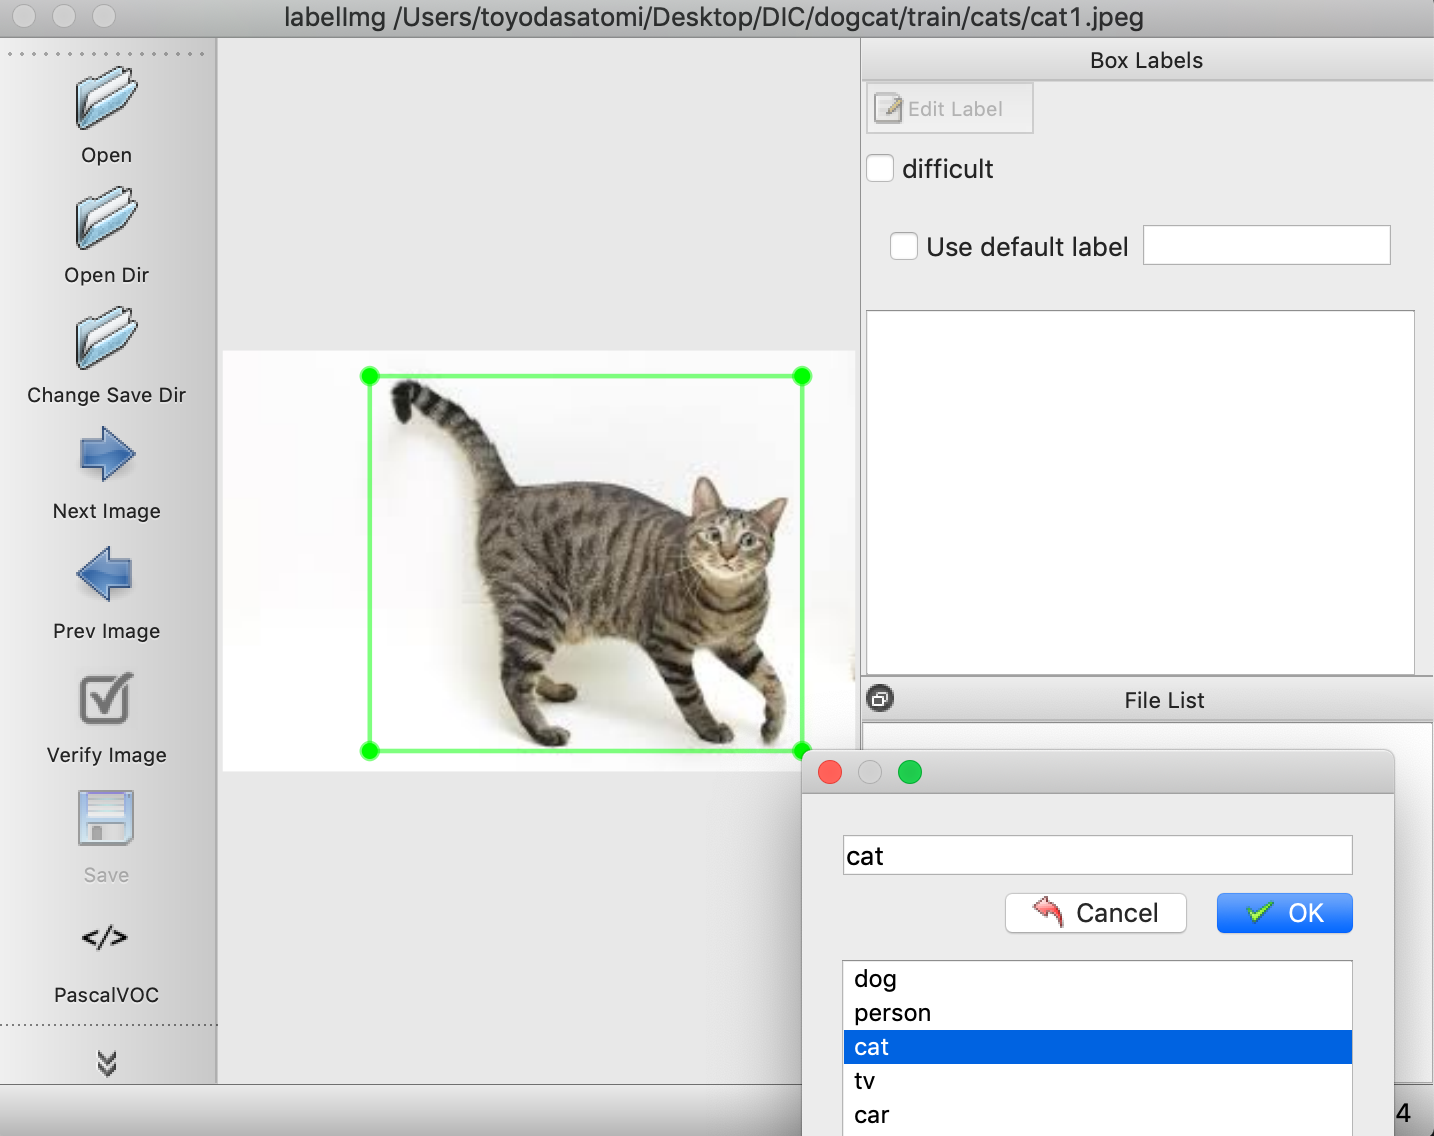

In [0]:
from IPython.display import display
from PIL import Image
neko = "スクリーンショット 2019-12-22 9.22.19.png"
display(Image.open(neko))

#### 出力ファイル

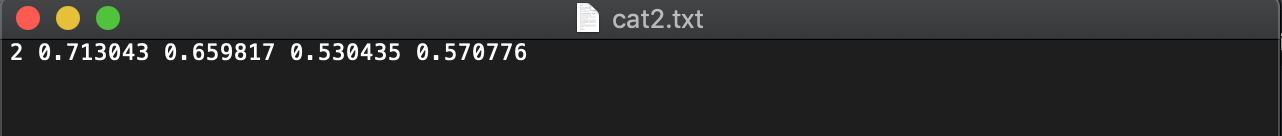

In [0]:
neko = "スクリーンショット 2019-12-22 9.22.58.png"
display(Image.open(neko))

## 【問題4】物体検出データセットに対するデータ拡張

#### アドバンス問題とのことでスキップ